In [1]:
import requests
import zipfile
import os
import numpy
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import string
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.callbacks import Callback

In [2]:
# import requests
# url = 'https://storage.googleapis.com/platzi-tf2/sign-language-img.zip'

# response = requests.get(url)
# with open('data/sign_language_img.zip', 'wb') as f:
#     f.write(response.content)

In [3]:
# # En donde tenemos el archivo local?
# local_zip = 'data/sign_language_img.zip'
# zip_ref = zipfile.ZipFile(local_zip, 'r')
# # En donde lo vamos a extraer? como se llamará la carpeta?
# zip_ref.extractall('data/sign_language_img')
# zip_ref.close()

# # Esto es opcional, pero yo prefiero eliminar el archivo zip
# os.remove(local_zip)

In [4]:
train_dir = 'data/sign_language_img/Train'
test_dir = 'data/sign_language_img/Test'

In [5]:
train_datagen = ImageDataGenerator(rescale=1/255)
test_datagen = ImageDataGenerator(rescale=1/255, validation_split=0.2)

In [6]:
train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(28, 28),
    batch_size=128,
    class_mode='categorical',
    color_mode = 'grayscale',
    subset = 'training'
)

validation_generator = test_datagen.flow_from_directory(
    test_dir,
    target_size=(28, 28),
    batch_size=128,
    class_mode='categorical',
    color_mode = 'grayscale',
    subset = 'validation'
)

test_generator = test_datagen.flow_from_directory(
    test_dir,
    target_size=(28, 28),
    batch_size=128,
    class_mode='categorical',
    color_mode = 'grayscale'
)

Found 27455 images belonging to 24 classes.
Found 1425 images belonging to 24 classes.
Found 7172 images belonging to 24 classes.


In [7]:
# Básicamente me crea una lista del abecedario exceptuando las que puse
clases = [char for char in string.ascii_uppercase if char!='J' if char != 'Z']

In [8]:
def plotImages(images_arr):
    fig, axes = plt.subplots(1, 5, figsize=(10, 10))
    axes = axes.flatten()
    for img, ax in zip(images_arr, axes):
        ax.imshow(img[:,:,0])
        ax.axis('off')
        
    plt.tight_layout()
    plt.show()

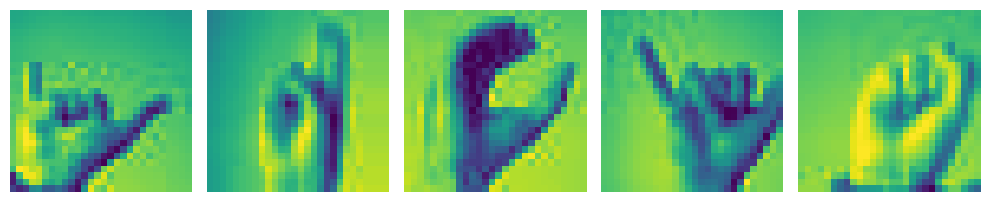

In [9]:
# Un generador siempre se usa con next
sample_training_images,_ = next(train_generator)
plotImages(sample_training_images[:5])

In [10]:
model_base = tf.keras.models.Sequential([
    # en este caso ya la comenzamos en flatten
    tf.keras.layers.Flatten(input_shape=(28,28,1)),
    tf.keras.layers.Dense(256, activation='relu'),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(len(clases), activation='softmax')
])

model_base.compile(optimizer='adam',
                    loss='categorical_crossentropy',
                    metrics=['accuracy'])

d:\USUARIO\Desktop\Pc\Estudio\Data\Auto\Data Science\Deep learning\GITHUB\MANEJO DE DATOS\env\lib\site-packages\keras\src\layers\reshaping\flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [11]:
model_base.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ flatten (Flatten)               │ (None, 784)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 256)            │       200,960 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 128)            │        32,896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 24)             │         3,096 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 236,952 (925.59 KB)

 Trainable params: 236,952 (925.59 KB)

 Non-trainable params: 0 (0.00 B)

In [12]:
hist = model_base.fit(
    train_generator,
    epochs = 20,
    validation_data= validation_generator
)

Epoch 1/20


d:\USUARIO\Desktop\Pc\Estudio\Data\Auto\Data Science\Deep learning\GITHUB\MANEJO DE DATOS\env\lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:122: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


215/215 ━━━━━━━━━━━━━━━━━━━━ 215s 884ms/step - accuracy: 0.2011 - loss: 2.7528 - val_accuracy: 0.4660 - val_loss: 1.7352
Epoch 2/20
215/215 ━━━━━━━━━━━━━━━━━━━━ 12s 54ms/step - accuracy: 0.5757 - loss: 1.4303 - val_accuracy: 0.5523 - val_loss: 1.4005
Epoch 3/20
215/215 ━━━━━━━━━━━━━━━━━━━━ 13s 57ms/step - accuracy: 0.6846 - loss: 1.0403 - val_accuracy: 0.6309 - val_loss: 1.2082
Epoch 4/20
215/215 ━━━━━━━━━━━━━━━━━━━━ 11s 51ms/step - accuracy: 0.7611 - loss: 0.7993 - val_accuracy: 0.6653 - val_loss: 1.1457
Epoch 5/20
215/215 ━━━━━━━━━━━━━━━━━━━━ 11s 48ms/step - accuracy: 0.8175 - loss: 0.6258 - val_accuracy: 0.6821 - val_loss: 1.0754
Epoch 6/20
215/215 ━━━━━━━━━━━━━━━━━━━━ 11s 47ms/step - accuracy: 0.8582 - loss: 0.4950 - val_accuracy: 0.6877 - val_loss: 1.1035
Epoch 7/20
215/215 ━━━━━━━━━━━━━━━━━━━━ 10s 46ms/step - accuracy: 0.8894 - loss: 0.3916 - val_accuracy: 0.6933 - val_loss: 1.0093
Epoch 8/20
215/215 ━━━━━━━━━━━━━━━━━━━━ 10s 46ms/step - accuracy: 0.9149 - loss: 0.3033 - val_accur

In [13]:
model_base.evaluate(test_generator)

57/57 ━━━━━━━━━━━━━━━━━━━━ 37s 662ms/step - accuracy: 0.7726 - loss: 1.1995


[1.2080856561660767, 0.7685443162918091]

In [14]:
def visualizacion_resultados(hist):
    epochs = [i for i in range(20)]
    fig, ax = plt.subplots(1, 2, figsize=(10, 6))
    
    train_acc = hist.history['accuracy']
    train_loss = hist.history['loss']
    
    val_acc = hist.history['val_accuracy']
    val_loss = hist.history['val_loss']
    
    ax[0].plot(epochs, train_acc, 'go-', label='Train accuracy')
    ax[0].plot(epochs, val_acc, 'ro-', label='Val accuracy')
    ax[0].set_title('Training and validation accuracy')
    ax[0].legend()
    ax[0].set_xlabel("Epochs")
    ax[0].set_ylabel("Accuracy")
    
    ax[1].plot(epochs, train_loss, 'g*-', label='Train loss')
    ax[1].plot(epochs, val_loss, 'r*-', label='Val loss')
    ax[1].set_title('Training and validation loss')
    ax[1].legend()
    ax[1].set_xlabel("Epochs")
    ax[1].set_ylabel("Loss")   

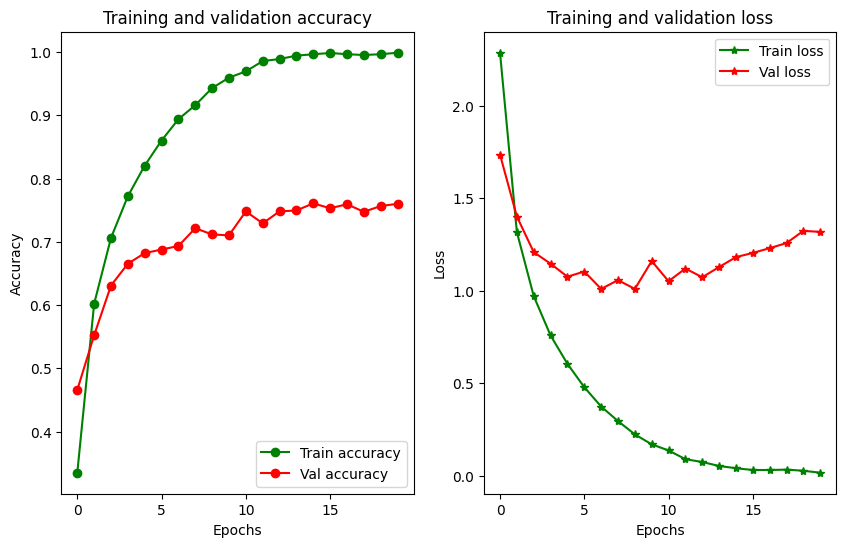

In [15]:
visualizacion_resultados(hist)

In [16]:
model_optimizer = tf.keras.models.Sequential([
    # en este caso ya la comenzamos en flatten
    tf.keras.layers.Flatten(input_shape=(28,28,1)),
    tf.keras.layers.Dense(256, kernel_regularizer = tf.keras.regularizers.l2(1e-5) ,activation='relu'),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(128, kernel_regularizer= tf.keras.regularizers.l2(1e-5),activation='relu'),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(len(clases), activation='softmax')
])

model_optimizer.compile(optimizer='adam',
                    loss='categorical_crossentropy',
                    metrics=['accuracy'])

In [17]:
model_optimizer.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ flatten_1 (Flatten)             │ (None, 784)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 256)            │       200,960 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 128)            │        32,896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 24)             │         3,096 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 236,952 (925.59 KB)

 Trainable params: 236,952 (925.59 KB)

 Non-trainable params: 0 (0.00 B)

In [18]:
hist_optimizer = model_optimizer.fit(
    train_generator,
    epochs = 20,
    validation_data= validation_generator
)

Epoch 1/20
215/215 ━━━━━━━━━━━━━━━━━━━━ 14s 54ms/step - accuracy: 0.1370 - loss: 2.8999 - val_accuracy: 0.4996 - val_loss: 1.7362
Epoch 2/20
215/215 ━━━━━━━━━━━━━━━━━━━━ 12s 53ms/step - accuracy: 0.4697 - loss: 1.6449 - val_accuracy: 0.5881 - val_loss: 1.2780
Epoch 3/20
215/215 ━━━━━━━━━━━━━━━━━━━━ 11s 47ms/step - accuracy: 0.5900 - loss: 1.2264 - val_accuracy: 0.6295 - val_loss: 1.1333
Epoch 4/20
215/215 ━━━━━━━━━━━━━━━━━━━━ 10s 46ms/step - accuracy: 0.6741 - loss: 0.9613 - val_accuracy: 0.6975 - val_loss: 1.0015
Epoch 5/20
215/215 ━━━━━━━━━━━━━━━━━━━━ 10s 46ms/step - accuracy: 0.7365 - loss: 0.7932 - val_accuracy: 0.7088 - val_loss: 0.9380
Epoch 6/20
215/215 ━━━━━━━━━━━━━━━━━━━━ 10s 46ms/step - accuracy: 0.7800 - loss: 0.6632 - val_accuracy: 0.7165 - val_loss: 0.8889
Epoch 7/20
215/215 ━━━━━━━━━━━━━━━━━━━━ 10s 44ms/step - accuracy: 0.8104 - loss: 0.5618 - val_accuracy: 0.7467 - val_loss: 0.8326
Epoch 8/20
215/215 ━━━━━━━━━━━━━━━━━━━━ 10s 44ms/step - accuracy: 0.8268 - loss: 0.5018 - 

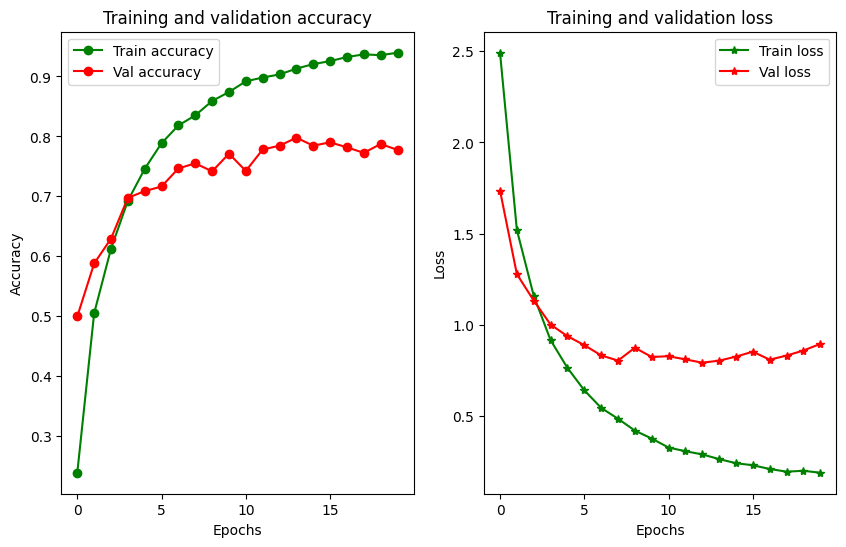

In [19]:
visualizacion_resultados(hist_optimizer)

In [20]:
model_convul = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(256, kernel_regularizer = tf.keras.regularizers.l2(1e-5) ,activation='relu'),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(128, kernel_regularizer= tf.keras.regularizers.l2(1e-5),activation='relu'),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(len(clases), activation='softmax')
])

model_convul.compile(optimizer='adam',
                    loss='categorical_crossentropy',
                    metrics=['accuracy'])

model_convul.summary()

d:\USUARIO\Desktop\Pc\Estudio\Data\Auto\Data Science\Deep learning\GITHUB\MANEJO DE DATOS\env\lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 26, 26, 32)     │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 13, 13, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_2 (Flatten)             │ (None, 5408)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_6 (Dense)                 │ (None, 256)            │     1,384,704 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_7 (Dense)                 │ (None, 128)            │        32,896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_8 (Dense)                 │ (None, 24)             │         3,096 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,421,016 (5.42 MB)

 Trainable params: 1,421,016 (5.42 MB)

 Non-trainable params: 0 (0.00 B)

In [21]:
hist_convul = model_convul.fit(
    train_generator,
    epochs = 20,
    validation_data= validation_generator
)

Epoch 1/20
215/215 ━━━━━━━━━━━━━━━━━━━━ 22s 82ms/step - accuracy: 0.2280 - loss: 2.5792 - val_accuracy: 0.6849 - val_loss: 0.9512
Epoch 2/20
215/215 ━━━━━━━━━━━━━━━━━━━━ 20s 90ms/step - accuracy: 0.7973 - loss: 0.6296 - val_accuracy: 0.8063 - val_loss: 0.6081
Epoch 3/20
215/215 ━━━━━━━━━━━━━━━━━━━━ 19s 88ms/step - accuracy: 0.9340 - loss: 0.2397 - val_accuracy: 0.8372 - val_loss: 0.5619
Epoch 4/20
215/215 ━━━━━━━━━━━━━━━━━━━━ 18s 82ms/step - accuracy: 0.9757 - loss: 0.1113 - val_accuracy: 0.8463 - val_loss: 0.5771
Epoch 5/20
215/215 ━━━━━━━━━━━━━━━━━━━━ 18s 82ms/step - accuracy: 0.9882 - loss: 0.0726 - val_accuracy: 0.8393 - val_loss: 0.6009
Epoch 6/20
215/215 ━━━━━━━━━━━━━━━━━━━━ 18s 84ms/step - accuracy: 0.9924 - loss: 0.0543 - val_accuracy: 0.8568 - val_loss: 0.5918
Epoch 7/20
215/215 ━━━━━━━━━━━━━━━━━━━━ 18s 82ms/step - accuracy: 0.9944 - loss: 0.0445 - val_accuracy: 0.8526 - val_loss: 0.6429
Epoch 8/20
215/215 ━━━━━━━━━━━━━━━━━━━━ 18s 81ms/step - accuracy: 0.9958 - loss: 0.0395 - 

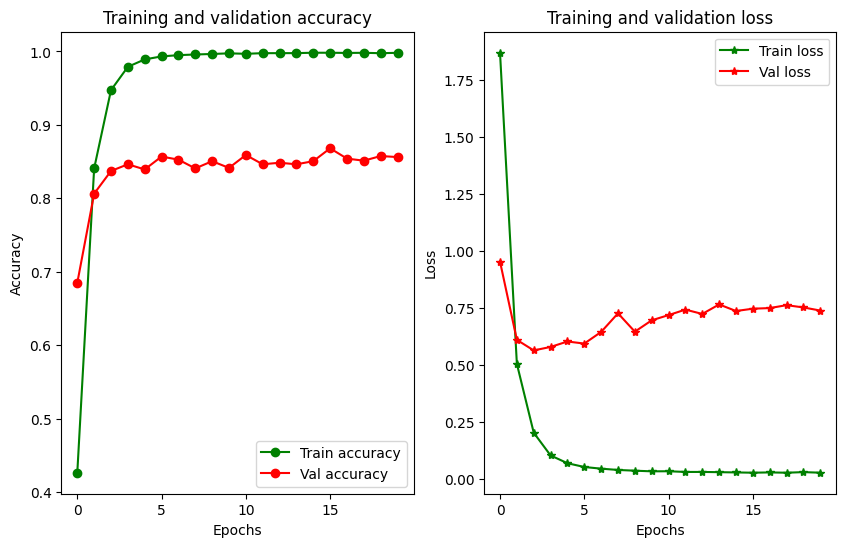

In [22]:
visualizacion_resultados(hist_convul)

In [23]:
model_callback = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(256, kernel_regularizer = tf.keras.regularizers.l2(1e-5) ,activation='relu'),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(128, kernel_regularizer= tf.keras.regularizers.l2(1e-5),activation='relu'),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(len(clases), activation='softmax')
])

model_callback.compile(optimizer='adam',
                    loss='categorical_crossentropy',
                    metrics=['accuracy'])

model_callback.summary()

Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_1 (Conv2D)               │ (None, 26, 26, 32)     │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 13, 13, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_3 (Flatten)             │ (None, 5408)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_9 (Dense)                 │ (None, 256)            │     1,384,704 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_4 (Dropout)             │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_10 (Dense)                │ (None, 128)            │        32,896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_5 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_11 (Dense)                │ (None, 24)             │         3,096 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,421,016 (5.42 MB)

 Trainable params: 1,421,016 (5.42 MB)

 Non-trainable params: 0 (0.00 B)

In [24]:
class TrainingCallback(Callback):
    def on_epoch_end(self, epoch, logs={}):
        if logs.get('accuracy') > 0.95:
            self.model.stop_training = True

In [25]:
callback = TrainingCallback()

In [26]:
hist_callback = model_callback.fit(
    train_generator,
    epochs = 20,
    callbacks=[callback],
    validation_data= validation_generator
)

Epoch 1/20
215/215 ━━━━━━━━━━━━━━━━━━━━ 20s 83ms/step - accuracy: 0.1836 - loss: 2.7483 - val_accuracy: 0.7165 - val_loss: 0.9617
Epoch 2/20
215/215 ━━━━━━━━━━━━━━━━━━━━ 18s 82ms/step - accuracy: 0.7728 - loss: 0.7281 - val_accuracy: 0.8028 - val_loss: 0.6278
Epoch 3/20
215/215 ━━━━━━━━━━━━━━━━━━━━ 18s 83ms/step - accuracy: 0.9130 - loss: 0.3018 - val_accuracy: 0.8168 - val_loss: 0.6048
Epoch 4/20
215/215 ━━━━━━━━━━━━━━━━━━━━ 18s 82ms/step - accuracy: 0.9638 - loss: 0.1515 - val_accuracy: 0.8337 - val_loss: 0.6014


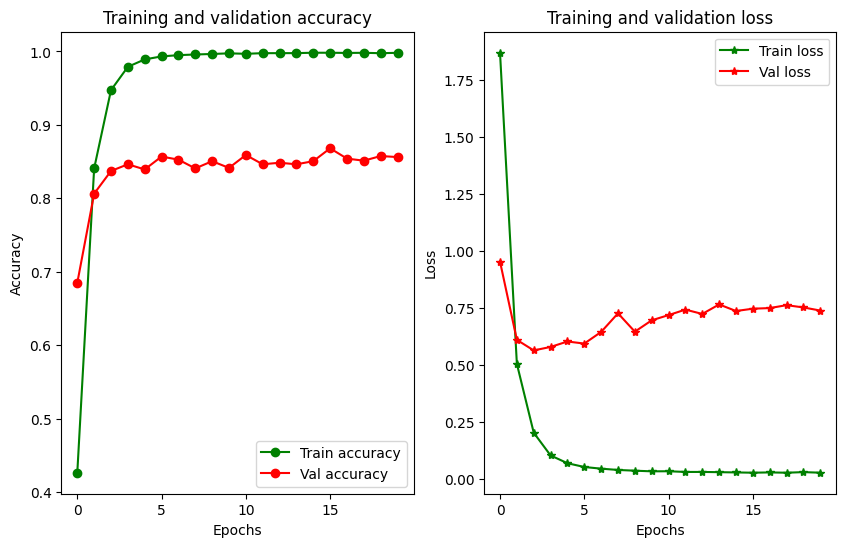

In [27]:
visualizacion_resultados(hist_convul)

In [28]:
def get_model():
    model = tf.keras.models.Sequential([
        tf.keras.layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)),
        tf.keras.layers.MaxPooling2D(2, 2),
        tf.keras.layers.Flatten(),
        tf.keras.layers.Dense(256, kernel_regularizer = tf.keras.regularizers.l2(1e-5) ,activation='relu'),
        tf.keras.layers.Dropout(0.2),
        tf.keras.layers.Dense(128, kernel_regularizer= tf.keras.regularizers.l2(1e-5),activation='relu'),
        tf.keras.layers.Dropout(0.2),
        tf.keras.layers.Dense(len(clases), activation='softmax')
    ])
    return model

model_early = get_model()
model_early.summary()
model_early.compile(optimizer='adam',
                    loss='categorical_crossentropy',
                    metrics=['accuracy'])

Model: "sequential_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_2 (Conv2D)               │ (None, 26, 26, 32)     │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 13, 13, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_4 (Flatten)             │ (None, 5408)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_12 (Dense)                │ (None, 256)            │     1,384,704 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_6 (Dropout)             │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_13 (Dense)                │ (None, 128)            │        32,896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_7 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_14 (Dense)                │ (None, 24)             │         3,096 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,421,016 (5.42 MB)

 Trainable params: 1,421,016 (5.42 MB)

 Non-trainable params: 0 (0.00 B)

In [29]:
callback_early = tf.keras.callbacks.EarlyStopping(monitor='loss', patience=3, mode='auto')

hist_early = model_early.fit(
    train_generator,
    epochs=20,
    callbacks=[callback_early],
    validation_data = validation_generator
)

Epoch 1/20
215/215 ━━━━━━━━━━━━━━━━━━━━ 20s 83ms/step - accuracy: 0.2858 - loss: 2.4209 - val_accuracy: 0.7340 - val_loss: 0.8104
Epoch 2/20
215/215 ━━━━━━━━━━━━━━━━━━━━ 18s 82ms/step - accuracy: 0.8553 - loss: 0.4760 - val_accuracy: 0.7986 - val_loss: 0.6164
Epoch 3/20
215/215 ━━━━━━━━━━━━━━━━━━━━ 18s 81ms/step - accuracy: 0.9567 - loss: 0.1789 - val_accuracy: 0.8225 - val_loss: 0.5909
Epoch 4/20
215/215 ━━━━━━━━━━━━━━━━━━━━ 18s 81ms/step - accuracy: 0.9820 - loss: 0.0951 - val_accuracy: 0.8330 - val_loss: 0.5965
Epoch 5/20
215/215 ━━━━━━━━━━━━━━━━━━━━ 18s 81ms/step - accuracy: 0.9916 - loss: 0.0596 - val_accuracy: 0.8211 - val_loss: 0.6201
Epoch 6/20
215/215 ━━━━━━━━━━━━━━━━━━━━ 18s 85ms/step - accuracy: 0.9943 - loss: 0.0460 - val_accuracy: 0.8309 - val_loss: 0.6619
Epoch 7/20
215/215 ━━━━━━━━━━━━━━━━━━━━ 18s 80ms/step - accuracy: 0.9961 - loss: 0.0377 - val_accuracy: 0.8302 - val_loss: 0.6904
Epoch 8/20
215/215 ━━━━━━━━━━━━━━━━━━━━ 19s 85ms/step - accuracy: 0.9958 - loss: 0.0385 - 

In [30]:
import kerastuner as kt

C:\Users\Usuario\AppData\Local\Temp\ipykernel_15288\1654478174.py:1: DeprecationWarning: `import kerastuner` is deprecated, please use `import keras_tuner`.
  import kerastuner as kt


In [31]:
def constructor_modelos(hp):
    model = tf.keras.models.Sequential()
    model.add(tf.keras.layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)))
    model.add(tf.keras.layers.MaxPooling2D((2, 2)))
    model.add(tf.keras.layers.Flatten())
    
    hp_units = hp.Int("units", min_value=32, max_value=512, step = 32)
    model.add(tf.keras.layers.Dense(units=hp_units, activation='relu', kernel_regularizer=tf.keras.regularizers.l2(1e-5)))
    model.add(tf.keras.layers.Dropout(0.2))
    model.add(tf.keras.layers.Dense(128, activation='relu', kernel_regularizer=tf.keras.regularizers.l2(1e-5)))
    model.add(tf.keras.layers.Dropout(0.2))
    model.add(tf.keras.layers.Dense(len(clases), activation='softmax'))
    
    hp_learning_rate = hp.Choice("learning_rate", values=[1e-2, 1e-3, 1e-4])
    
    model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=hp_learning_rate),
                    loss='categorical_crossentropy',
                    metrics=['accuracy'])
    
    return model

In [32]:
tuner = kt.Hyperband(
    constructor_modelos,
    objective='val_accuracy',
    max_epochs=20,
    factor=3,
    directory='models/',
    project_name='kt_hyperband'
)

Reloading Tuner from models/kt_hyperband\tuner0.json


In [33]:
tuner.search(train_generator, epochs=20, validation_data = validation_generator)

best_hps = tuner.get_best_hyperparameters(num_trials=1)[0]

In [34]:
print(best_hps.get('units'))

320


In [35]:
print(best_hps.get('learning_rate'))

0.01


In [36]:
hypermodel = tuner.hypermodel.build(best_hps)

history_hypermodoel = hypermodel.fit(train_generator, epochs=20, callbacks=[callback_early], validation_data=validation_generator)

Epoch 1/20
215/215 ━━━━━━━━━━━━━━━━━━━━ 22s 90ms/step - accuracy: 0.3361 - loss: 2.2420 - val_accuracy: 0.8035 - val_loss: 0.7530
Epoch 2/20
215/215 ━━━━━━━━━━━━━━━━━━━━ 19s 89ms/step - accuracy: 0.9333 - loss: 0.2289 - val_accuracy: 0.8414 - val_loss: 0.7200
Epoch 3/20
215/215 ━━━━━━━━━━━━━━━━━━━━ 19s 89ms/step - accuracy: 0.9738 - loss: 0.1223 - val_accuracy: 0.8512 - val_loss: 0.8885


In [37]:
config_dict = hypermodel.get_config()

In [38]:
print(config_dict)

{'name': 'sequential_5', 'trainable': True, 'dtype': {'module': 'keras', 'class_name': 'DTypePolicy', 'config': {'name': 'float32'}, 'registered_name': None}, 'layers': [{'module': 'keras.layers', 'class_name': 'InputLayer', 'config': {'batch_shape': (None, 28, 28, 1), 'dtype': 'float32', 'sparse': False, 'name': 'input_layer_5'}, 'registered_name': None}, {'module': 'keras.layers', 'class_name': 'Conv2D', 'config': {'name': 'conv2d_3', 'trainable': True, 'dtype': {'module': 'keras', 'class_name': 'DTypePolicy', 'config': {'name': 'float32'}, 'registered_name': None}, 'filters': 32, 'kernel_size': (3, 3), 'strides': (1, 1), 'padding': 'valid', 'data_format': 'channels_last', 'dilation_rate': (1, 1), 'groups': 1, 'activation': 'relu', 'use_bias': True, 'kernel_initializer': {'module': 'keras.initializers', 'class_name': 'GlorotUniform', 'config': {'seed': None}, 'registered_name': None}, 'bias_initializer': {'module': 'keras.initializers', 'class_name': 'Zeros', 'config': {}, 'registere

In [39]:
model_same_config = tf.keras.Sequential.from_config(config_dict)

In [40]:
model_same_config.summary()

Model: "sequential_5"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_3 (Conv2D)               │ (None, 26, 26, 32)     │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 13, 13, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_5 (Flatten)             │ (None, 5408)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_15 (Dense)                │ (None, 320)            │     1,730,880 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_8 (Dropout)             │ (None, 320)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_16 (Dense)                │ (None, 128)            │        41,088 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_9 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_17 (Dense)                │ (None, 24)             │         3,096 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,775,384 (6.77 MB)

 Trainable params: 1,775,384 (6.77 MB)

 Non-trainable params: 0 (0.00 B)

In [41]:
from tensorflow.keras.callbacks import ModelCheckpoint

In [42]:
model_weight = get_model()
model_weight.summary()

Model: "sequential_6"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_4 (Conv2D)               │ (None, 26, 26, 32)     │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_4 (MaxPooling2D)  │ (None, 13, 13, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_6 (Flatten)             │ (None, 5408)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_18 (Dense)                │ (None, 256)            │     1,384,704 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_10 (Dropout)            │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_19 (Dense)                │ (None, 128)            │        32,896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_11 (Dropout)            │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_20 (Dense)                │ (None, 24)             │         3,096 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,421,016 (5.42 MB)

 Trainable params: 1,421,016 (5.42 MB)

 Non-trainable params: 0 (0.00 B)

In [43]:
model_weight.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])   

In [44]:
from keras.callbacks import ModelCheckpoint

checkpoin_path = 'model_checpoints/checkpoint.weights.h5'
checkpoin_weights = ModelCheckpoint(
    filepath=checkpoin_path,
    save_freq = 'epoch',
    save_weights_only=True,
    verbose=1
)

In [45]:
hits_weight = model_weight.fit(train_generator, epochs=20, callbacks=[checkpoin_weights], validation_data=validation_generator)

Epoch 1/20
215/215 ━━━━━━━━━━━━━━━━━━━━ 0s 83ms/step - accuracy: 0.2206 - loss: 2.6277
Epoch 1: saving model to model_checpoints/checkpoint.weights.h5
215/215 ━━━━━━━━━━━━━━━━━━━━ 22s 94ms/step - accuracy: 0.2215 - loss: 2.6245 - val_accuracy: 0.6891 - val_loss: 0.9739
Epoch 2/20
214/215 ━━━━━━━━━━━━━━━━━━━━ 0s 89ms/step - accuracy: 0.7770 - loss: 0.6969
Epoch 2: saving model to model_checpoints/checkpoint.weights.h5
215/215 ━━━━━━━━━━━━━━━━━━━━ 20s 93ms/step - accuracy: 0.7774 - loss: 0.6957 - val_accuracy: 0.7811 - val_loss: 0.6412
Epoch 3/20
214/215 ━━━━━━━━━━━━━━━━━━━━ 0s 82ms/step - accuracy: 0.9177 - loss: 0.2880
Epoch 3: saving model to model_checpoints/checkpoint.weights.h5
215/215 ━━━━━━━━━━━━━━━━━━━━ 19s 85ms/step - accuracy: 0.9179 - loss: 0.2875 - val_accuracy: 0.7979 - val_loss: 0.6164
Epoch 4/20
214/215 ━━━━━━━━━━━━━━━━━━━━ 0s 80ms/step - accuracy: 0.9654 - loss: 0.1428
Epoch 4: saving model to model_checpoints/checkpoint.weights.h5
215/215 ━━━━━━━━━━━━━━━━━━━━ 18s 84ms/s

In [46]:
model_weight.save_weights('model_manul/my_model.weights.h5')

In [47]:
model_weight2 = get_model()
model_weight2.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])   

In [48]:
model_weight2.load_weights(checkpoin_path)

d:\USUARIO\Desktop\Pc\Estudio\Data\Auto\Data Science\Deep learning\GITHUB\MANEJO DE DATOS\env\lib\site-packages\keras\src\saving\saving_lib.py:713: UserWarning: Skipping variable loading for optimizer 'adam', because it has 2 variables whereas the saved optimizer has 18 variables. 
  saveable.load_own_variables(weights_store.get(inner_path))


In [49]:
model_weight2.evaluate(test_generator)

57/57 ━━━━━━━━━━━━━━━━━━━━ 5s 78ms/step - accuracy: 0.8662 - loss: 0.6851


[0.6387304663658142, 0.8697713613510132]

In [50]:
model_weight.evaluate(test_generator)

57/57 ━━━━━━━━━━━━━━━━━━━━ 4s 72ms/step - accuracy: 0.8768 - loss: 0.6076


[0.6387305855751038, 0.8697713613510132]

## Criterios para almacenar los mejores modelos

In [51]:
checkpoin_path = 'model_checpoints_complete/checkpoint.keras'
checkpoin_weights = ModelCheckpoint(
    filepath=checkpoin_path,
    save_freq = 'epoch',
    save_weights_only = False,
    monitor = 'val_accuracy',
    save_best_only = True,
    verbose=1
)

In [52]:
model_complete = get_model()
model_complete.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

hist_complete = model_complete.fit(train_generator, epochs=20, callbacks=[checkpoin_weights], validation_data = validation_generator)  

Epoch 1/20
214/215 ━━━━━━━━━━━━━━━━━━━━ 0s 107ms/step - accuracy: 0.2712 - loss: 2.4778
Epoch 1: val_accuracy improved from -inf to 0.71158, saving model to model_checpoints_complete/checkpoint.keras
215/215 ━━━━━━━━━━━━━━━━━━━━ 27s 113ms/step - accuracy: 0.2731 - loss: 2.4709 - val_accuracy: 0.7116 - val_loss: 0.8757
Epoch 2/20
215/215 ━━━━━━━━━━━━━━━━━━━━ 0s 99ms/step - accuracy: 0.8185 - loss: 0.5780
Epoch 2: val_accuracy improved from 0.71158 to 0.80772, saving model to model_checpoints_complete/checkpoint.keras
215/215 ━━━━━━━━━━━━━━━━━━━━ 22s 102ms/step - accuracy: 0.8186 - loss: 0.5774 - val_accuracy: 0.8077 - val_loss: 0.6149
Epoch 3/20
215/215 ━━━━━━━━━━━━━━━━━━━━ 0s 98ms/step - accuracy: 0.9346 - loss: 0.2359
Epoch 3: val_accuracy did not improve from 0.80772
215/215 ━━━━━━━━━━━━━━━━━━━━ 22s 103ms/step - accuracy: 0.9347 - loss: 0.2357 - val_accuracy: 0.8035 - val_loss: 0.6550
Epoch 4/20
214/215 ━━━━━━━━━━━━━━━━━━━━ 0s 98ms/step - accuracy: 0.9747 - loss: 0.1160
Epoch 4: val_

In [57]:
model_complete.save('saved_model_complete/mymodel.keras')

In [60]:
model_complete3 = tf.keras.models.load_model('saved_model_complete/mymodel.keras')

In [61]:
model_complete3.evaluate(test_generator)

57/57 ━━━━━━━━━━━━━━━━━━━━ 7s 115ms/step - accuracy: 0.8562 - loss: 0.7639


[0.7387470006942749, 0.85764080286026]

In [62]:
model_complete.evaluate(test_generator)

57/57 ━━━━━━━━━━━━━━━━━━━━ 3s 59ms/step - accuracy: 0.8578 - loss: 0.7388


[0.7387471199035645, 0.85764080286026]